#  Self-Study 5: Coupled Dynamics and Stability

In this self-study, we will explore the concepts of stability and coupled dynamics. A key part of our approach will involve using symbolic mathematics.

If you are not familiar with `sympy`, take a look at the notebook `sympy_basics.ipynb` for a quick introduction.
This notebook also contains examples on how to use `sympy` to compute the Jacobian matrix of a system of differential equations.

## Section 1: Fixed Points and Phase Portrait

In this section we will be looking at the dynamics of a system of ODEs with **two coupled** variables, $x$ and $y$.

$$
\frac{dx}{dt} = \alpha x - \beta x^2 - \gamma xy
$$
$$
\frac{dy}{dt} = \delta y - y^2 - xy
$$


### Task 1: Find the fixed points analytically (with `sympy`)


The fixed points are the points where the derivatives are zero.
In other words, if the system starts at such a point, it will remain fixed there unless perturbed.

In [15]:
from sympy import symbols, Eq, solve

# Declare variables, hint: use symbols()
x, y = symbols('x y') # your code here

alpha, beta, gamma, delta = symbols('alpha beta gamma delta') # your code here

# Define the equations for dx/dt and dy/dt
dx_dt = alpha * x - beta * x**2 - gamma * x * y
dy_dt = delta*y-y**2-x*y

# Set up equations for fixed points
eq1 = Eq(dx_dt, 0) # your code here
eq2 = Eq(dy_dt, 0) # your code here

# Solve for fixed points
fixed_points = solve((eq1, eq2), (x,y)) # your code here

for fixed_point in fixed_points:
    print("Fixed point #" + str(fixed_points.index(fixed_point)) + ":")
    print(fixed_point[0], fixed_point[1])


Fixed point #0:
0 0
Fixed point #1:
0 delta
Fixed point #2:
alpha/beta 0
Fixed point #3:
(alpha - delta*gamma)/(beta - gamma) (-alpha + beta*delta)/(beta - gamma)


### Task 2: Plot the phase portrait

The phase portrait is a plot of the trajectories of the system in the $x-y$ plane. It is useful to visualise the dynamics of the system.


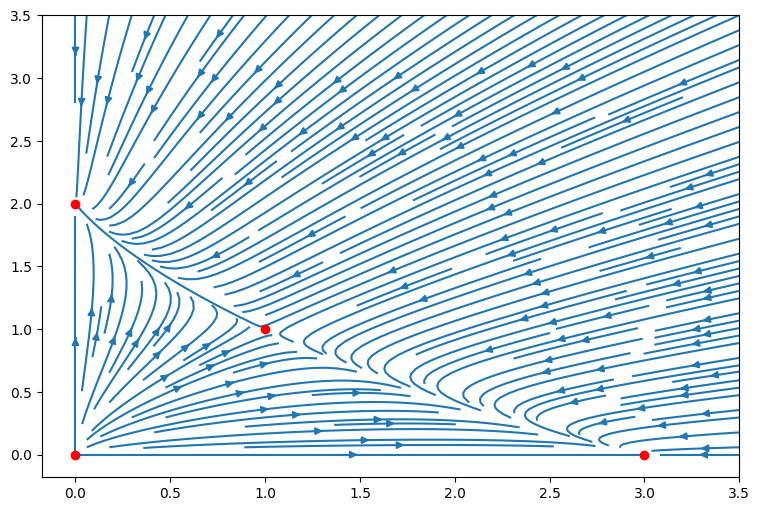

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find numerical fixed points for the symbolic solutions you found earlier.
# You can start with these values (Slide 11), but feel free to change them to see what happens.

alpha_val = 3
beta_val = 1
gamma_val = 2
delta_val = 2

fixed_points_val = []
for x, y in fixed_points:
    x_eval = x.subs({alpha: alpha_val, beta: beta_val, delta: delta_val, gamma: gamma_val})
    y_eval = y.subs({alpha: alpha_val, beta: beta_val, delta: delta_val, gamma: gamma_val})
    fixed_points_val.append((x_eval, y_eval))
    # **Hint:** Look at the sympy documentation for the `subs` method
    # your code here


# Step 2: Generate streamplot of the vector field defined by the equations above.
# **Hint:** Look at the matplotlib documentation for the `streamplot` function.
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))

# compute the vector field at the meshgrid points
U = alpha_val * X - beta_val * X**2 -gamma_val*X*Y # your code here
V = delta_val * Y - Y**2 - X * Y# your code here

# use plt.streamplot to plot
def plot_phase_portrait():
    plt.figure(figsize=(9,6))
    plt.streamplot(X, Y, U, V, density=2)
    # Step 3: Overlay fixed points onto the streamplot

    for fixed_point_val in fixed_points_val:
        plt.plot(fixed_point_val[0], fixed_point_val[1], 'ro')
    plt.show()
plot_phase_portrait()

## Section 2: Stability of Fixed Points

Using the same system as above, investigate the stability of the fixed points.

1. Find the fixed points of the system (i.e., Task 1 above).
1. Define the Jacobian matrix of the system.
2. Find its eigenvalues at each fixed point.
3. Determine the stability (see Lecture 5, Slide 8).

The Jacobian matrix is given by:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}
$$


In [38]:
from sympy import Matrix, diff, Eq, solve

# 1. Find Fixed Points (Same system as above)
x, y = symbols('x y')

# this time we will use explicit values for the parameters
alpha, beta, gamma, delta = 3, 1, 2, 2

f = alpha * x - beta * x**2 -gamma * x * y # your code here
g = delta * y - y**2 - x*y # your code here

eq1 = Eq(f, 0)
eq2 = Eq(g, 0)

fixed_points = solve((eq1, eq2), (x, y)) # your code here
fixed_points

[(0, 0), (0, 2), (1, 1), (3, 0)]

In [39]:
# 2. Create the Jacobian Matrix
# Hint: use Matrix and diff from sympy to compute the Jacobian matrix
from sympy import diff, Matrix


# Define the Jacobian matrix
J = Matrix([[diff(f, x), diff(f, y)], [diff(g, x), diff(g, y)]])

In [51]:
# 3. Compute eigenvalues for each fixed point 
import numpy as np

eigenvalues = J.eigenvals()
# print(J)
# if isinstance(J, Matrix):
#         J = np.array(J.tolist()).astype(np.float64)
        
tau = np.trace(J)
Delta = np.linalg.det(J)


fixed_point_eigenvals = []
types = []
for point in fixed_points:
    evs = list(eigenvalues.keys())
    evaluated_tau = tau.subs({x: point[0], y: point[1]})
    evaluated_Delta = Delta.subs({x: point[0], y: point[1]})
    fixed_point_eigenvals.append((evs[0].subs({x: point[0], y:point[1]}), evs[1].subs({x: point[0], y:point[1]})))
    print(evaluated_Delta)
    if evaluated_Delta < 0:
        types.append("Saddle")
    else:
        if evaluated_tau**2 > 4*evaluated_Delta:
            if evaluated_tau > 0:
                types.append("Unstable node")
            else:
                types.append("Stable node")
        if evaluated_tau == 0:
            types.append("Circle")
        elif evaluated_tau**2 < 4*evaluated_Delta:
            if evaluated_tau > 0:
                types.append("Unstable spiral")
            else:
                types.append("Stable spiral")

print(fixed_point_eigenvals)
print(types)


Matrix([[-2*x - 2*y + 3, -2*x], [-y, -x - 2*y + 2]])


TypeError: Cannot convert expression to float

## Section 3: An Application
Let's explore an economic model inspired by the Lotka-Volterra equations:

1. **Resource (r)**: Represents a natural resource that grow at a constant rate $a$, e.g., grain.
2. **Producers (y)**: Companies consume the resource to produce output $y$, at an operational cost of $c$, e.g., labor costs.
3. **Production**: The resource is consumed at a rate $k$ proportional to both current production $y$ and available resources $r$.


The model is described by the following differential equations:
$$
\frac{dr}{dt} = a r - k y r
$$
$$
\frac{dy}{dt} = k y r -c y
$$


### Task 1: Find the fixed points and the eigenvalues of the Jacobian matrix

What do we learn from these eigenvalues?

In [ ]:
from sympy import symbols, Eq, solve, Matrix

# 1. Declare variables as symbols

# 2. Define parameters

# 3. Define the differential equations

# 4. Find Fixed Points

# 5. Define the Jacobian matrix

# 6. Compute eigenvalues at each fixed point


### Task 2: Plot the phase portrait

In [ ]:
from scipy.integrate import odeint

In [ ]:
def lv_system(x, t, a, k, c):
    # your code here
    return [dR_dt, dY_dt]

In [ ]:
# plot Phase Portrait


### Task 3: Adapt the model (Optional)

1. Given the base model, change it to include a new concept, e.g., consumers, multiple resources, etc.
2. Make a new phase portrait for the adapted model.
3. Describe how the changes affect the dynamics of the system.